Tempo de execução: 19.34 segundos


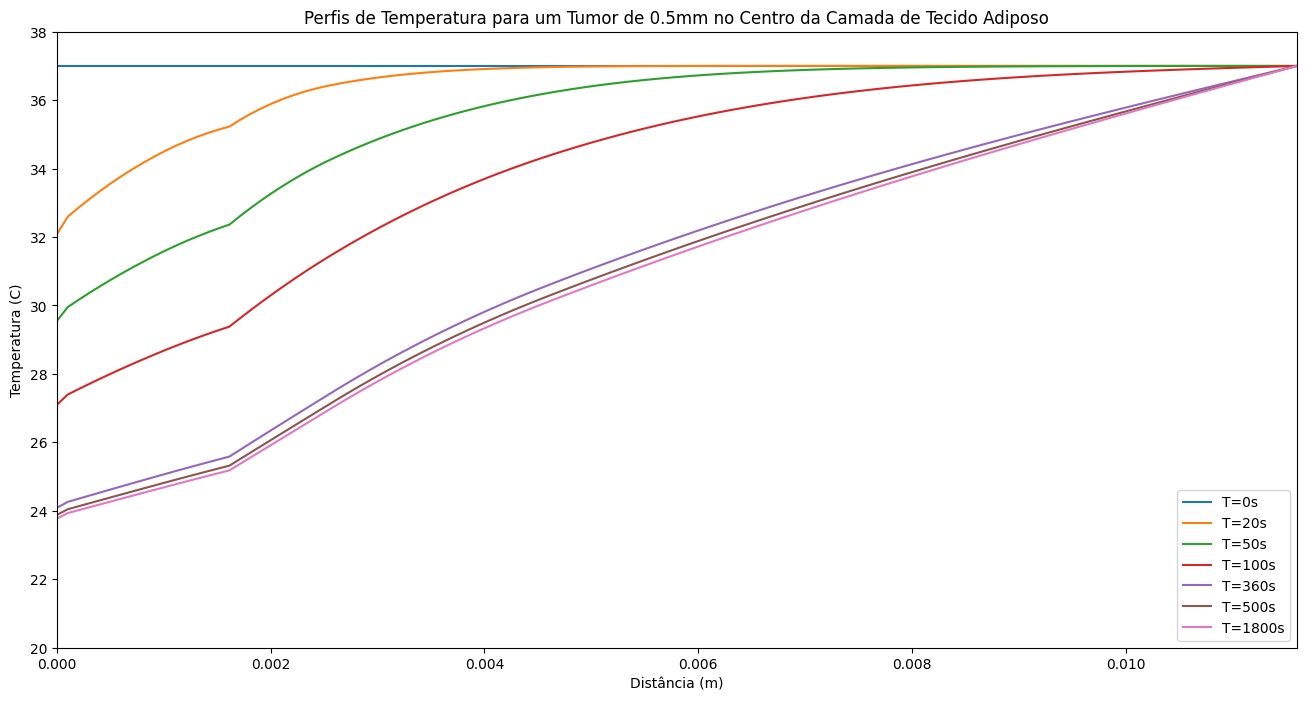

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time

def tumor_adiposo():
    start_time = time.time()
    #global dt
    # Propriedades das camadas
    d1, rho1, c1, k1, w1, q1 = 0.0001, 1200, 3589, 0.235, 0, 0
    d2, rho2, c2, k2, w2, q2 = 0.0007, 1200, 3300, 0.445, 0.0002, 368.1
    d3, rho3, c3, k3, w3, q3 = 0.0008, 1200, 3300, 0.445, 0.0013, 368.1
    d4, rho4, c4, k4, w4, q4 = 0.002, 1000, 2674, 0.185, 0.0001, 368.3
    d5, rho5, c5, k5, w5, q5 = 0.008, 1085, 3800, 0.51, 0.0027, 684.2
    rho_tumor, c_tumor, k_tumor, w_tumor, q_tumor = 1030, 3852, 0.558, 0.0063, 3700
    rho_b, c_b = 1060, 3700
    h = 100

    # Critério de estabilidade
    dx = 1e-4  # Passo de malha espacial
    alpha_min = min(k1 / (rho1 * c1), k2 / (rho2 * c2), k3 / (rho3 * c3), k4 / (rho4 * c4), k5 / (rho5 * c5), k_tumor / (rho_tumor * c_tumor))
    dt = dx**2 / (2 * alpha_min * 3)  # Passo de tempo baseado no critério de estabilidade

    T_simul = 1800  # Tempo total de simulação em segundos
    passos = round(T_simul / dt)
    x_total = 11.6e-3  # Comprimento total em metros
    N = round(x_total / dx)
    To = 37
    Te = 20
    St = 0 #0.001  # Tamanho do tumor

    # Inicialização
    temperatura_inicial = np.ones(N) * To
    t_anterior = temperatura_inicial
    grava_dados = [temperatura_inicial]

    tempo_atual = 0  # Controle de tempo para gravação

    for i in range(passos):  # Loop no tempo
        t_atual = np.zeros(N)

        # Condição de contorno no primeiro ponto
        t_atual[0] = (4 * k1 * t_anterior[1] - k1 * t_anterior[2] + 2 * h * dx * Te) / (3 * k1 + 2 * h * dx) #(dx*h*Te+k1*t_anterior[1])/(k1+dx*h)

        for j in range(1, N - 1):  # Loop no espaço
            x_pos = j * dx

            if x_pos < d1:  # Camada 1
                t_atual[j] = ((k1 * (t_anterior[j + 1] - 2 * t_anterior[j] + t_anterior[j - 1]) / dx**2) + rho_b * c_b * w1 * (2**((t_anterior[j] - To)/10)) * (To - t_anterior[j]) + q1 * (2**((t_anterior[j] - To)/10))) * (dt / (rho1 * c1)) + t_anterior[j]
            elif x_pos == d1: # Interface entre as camadas 1 e 2
                t_atual[j] = (k2*t_anterior[j+1] + k1*t_anterior[j-1])/(k1 + k2)
            elif x_pos < d1 + d2:  # Camada 2
                t_atual[j] = ((k2 * (t_anterior[j + 1] - 2 * t_anterior[j] + t_anterior[j - 1]) / dx**2) + rho_b * c_b * w2 * (2**((t_anterior[j] - To)/10)) * (To - t_anterior[j]) + q2 * (2**((t_anterior[j] - To)/10))) * (dt / (rho2 * c2)) + t_anterior[j]
            elif x_pos == d1+d2: # Interface entre as camadas 2 e 3
                t_atual[j] = (k3*t_anterior[j+1] + k2*t_anterior[j-1])/(k2 + k3)
            elif x_pos < d1 + d2 + d3:  # Camada 3
                t_atual[j] = ((k3 * (t_anterior[j + 1] - 2 * t_anterior[j] + t_anterior[j - 1]) / dx**2) + rho_b * c_b * w3 * (2**((t_anterior[j] - To)/10)) * (To - t_anterior[j]) + q3 * (2**((t_anterior[j] - To)/10))) * (dt / (rho3 * c3)) + t_anterior[j]
            elif x_pos == d1+d2+d3: # Interface entre as camadas 3 e 4
                t_atual[j] = (k4*t_anterior[j+1] + k3*t_anterior[j-1])/(k3 + k4)
            elif x_pos < d1 + d2 + d3 + (d4/2) - (St/2):  # Camada 4 antes do tumor
                t_atual[j] = ((k4 * (t_anterior[j + 1] - 2 * t_anterior[j] + t_anterior[j - 1]) / dx**2) + rho_b * c_b * w4 * (2**((t_anterior[j] - To)/10)) * (To - t_anterior[j]) + q4 * (2**((t_anterior[j] - To)/10))) * (dt / (rho4 * c4)) + t_anterior[j]
            elif x_pos == d1 + d2 + d3 + (d4/2) - (St/2): # Interface entre a camada 4 e o tumor antes
                t_atual[j] = (k_tumor * t_anterior[j+1] + k4*t_anterior[j-1])/(k4 + k_tumor)
            elif x_pos < d1 + d2 + d3 + d4 + (d4 / 2 + St / 2):  # Dentro do tumor
                t_atual[j] = ((k_tumor * (t_anterior[j + 1] - 2 * t_anterior[j] + t_anterior[j - 1]) / dx**2) + rho_b * c_b * w_tumor * (1.1**((t_anterior[j] - To)/10)) * (To - t_anterior[j]) + q_tumor * (1.1**((t_anterior[j] - To)/10))) * (dt / (rho_tumor * c_tumor)) + t_anterior[j]
            elif x_pos == d1 + d2 + d3 + (d4/2) + (St/2): # Interface entre a camada 4 e o tumor depois
                t_atual[j] = (k4 * t_anterior[j+1] + k_tumor*t_anterior[j-1])/(k4 + k_tumor)
            elif x_pos < d1 + d2 + d3 + d4: #camada 4 após o tumor
                t_atual[j] = ((k4 * (t_anterior[j + 1] - 2 * t_anterior[j] + t_anterior[j - 1]) / dx**2) + rho_b * c_b * w4 * (2**((t_anterior[j] - To)/10)) * (To - t_anterior[j]) + q4 * (2**((t_anterior[j] - To)/10))) * (dt / (rho5 * c4)) + t_anterior[j]
            elif x_pos == d1 + d2 + d3 + d4 + d5: # Interface entre as camadas 4 e 5
                t_atual[j] = (k5 * t_anterior[j+1] + k4 * t_anterior[j-1])/(k4 + k5)
            else:  # Camada 5
                t_atual[j] = ((k5 * (t_anterior[j + 1] - 2 * t_anterior[j] + t_anterior[j - 1]) / dx**2) + rho_b * c_b * w5 * (2**((t_anterior[j] - To)/10)) * (To - t_anterior[j]) + q5 * (2**((t_anterior[j] - To)/10))) * (dt / (rho5 * c5)) + t_anterior[j]

        # Condição de contorno no último ponto
        t_atual[-1] = To

        tempo_atual += dt
        if abs(tempo_atual - round(tempo_atual)) < 0.1*dt:  # Grava apenas a cada 1 segundo
            grava_dados.append(t_atual)

        t_anterior = t_atual

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Tempo de execução: {execution_time:.2f} segundos")
    return grava_dados

# Exemplo de execução
gravados_adiposo = tumor_adiposo()

###PLOT
dx = 1e-4
x_tot = 11.6e-3
N = round(x_tot/dx)
pontos_x = np.linspace(0,x_tot,N)

t_0_adiposo = gravados_adiposo[0]
t_20_adiposo = gravados_adiposo[4-1]
t_50_adiposo = gravados_adiposo[10-1]
t_100_adiposo = gravados_adiposo[20-1]
t_360_adiposo = gravados_adiposo[72-1]
t_500_adiposo = gravados_adiposo[100-1]
t_1800_adiposo = gravados_adiposo[360-1]

plt.figure(figsize=(16, 8))
plt.plot(pontos_x,t_0_adiposo,label = 'T=0s')
plt.plot(pontos_x,t_20_adiposo,label = 'T=20s')
plt.plot(pontos_x,t_50_adiposo,label = 'T=50s')
plt.plot(pontos_x,t_100_adiposo,label = 'T=100s')
plt.plot(pontos_x,t_360_adiposo,label = 'T=360s')
plt.plot(pontos_x,t_500_adiposo,label = 'T=500s')
plt.plot(pontos_x,t_1800_adiposo,label = 'T=1800s')

plt.axis((0, x_tot, 20, 38))
plt.legend()
plt.xlabel('Distância (m)')
plt.ylabel('Temperatura (C)')
plt.title('Perfis de Temperatura para um Tumor de 0.5mm no Centro da Camada de Tecido Adiposo')
plt.show()
